In [1]:
import json
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
with open('../JSON/new_mvp_final.json', 'r') as loadFile:
    data =  pd.DataFrame(json.load(loadFile))
df = pd.read_csv('../JSON/totals.csv')

In [21]:
df[df['Share']!=0].tail()

,Rk,Player,Season,MVP,First,Share,Pos,Age,Tm,G,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Team.Wins
4814,194,James Harden,2018,True,86,0.955,SG,28,HOU,72,...,41,348,389,630,126,50,315,169,2191,65
4842,248,LeBron James,2018,False,15,0.731,PF,33,CLE,82,...,97,612,709,747,116,71,347,136,2251,50
4867,298,Damian Lillard,2018,False,0,0.205,PG,27,POR,73,...,62,263,325,481,77,27,206,117,1962,49
4913,382,Victor Oladipo,2018,False,0,0.002,SG,25,IND,75,...,47,343,390,323,177,57,219,175,1735,48
4978,508,Russell Westbrook,2018,False,0,0.075,PG,29,OKC,80,...,152,652,804,820,147,20,381,200,2028,48


In [3]:
train_data = data[data['Share'] != 0].drop('Season', axis=1)

In [22]:
pos_mapping = {
    'PG': 1,
    'SG': 2,
    'SF': 3,
    'PF': 4,
    'C': 5
}

train_data['Pos'] = train_data['Pos'].map(pos_mapping)
df['Pos'] = df['Pos'].map(pos_mapping)

In [23]:
train_data.dropna(inplace=True)
df.dropna(inplace=True)

In [27]:
# train_data = train_data.reset_index(drop=True)
# train_data = train_data.sort_values(['MVP_Season', 'Share'], ascending=[True, False])
# train_data.head()
new_data = df.sort_values(['Season', 'Share'], ascending=[True, False])
new_data = new_data.reset_index(drop=True)
new_data.head(20)

,Rk,Player,Season,MVP,First,Share,Pos,Age,Tm,G,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Team.Wins
0,294,Shaquille O'Neal,2000,True,120,0.998,5,27,LAL,79,...,336,742,1078,299,36,239,223,255,2344,67
1,140,Kevin Garnett,2000,False,0,0.337,4,23,MIN,81,...,223,733,956,401,120,126,268,205,1857,50
2,280,Alonzo Mourning,2000,False,0,0.303,5,29,MIA,79,...,215,538,753,123,40,294,217,308,1718,52
3,243,Karl Malone,2000,False,0,0.258,4,36,UTA,82,...,169,610,779,304,79,71,231,229,2095,55
4,117,Tim Duncan,2000,False,0,0.205,4,23,SAS,74,...,262,656,918,234,66,165,242,210,1716,53
5,311,Gary Payton,2000,False,0,0.149,1,31,SEA,82,...,100,429,529,732,153,18,224,178,1982,45
6,187,Allen Iverson,2000,False,1,0.109,2,24,PHI,70,...,71,196,267,328,144,5,230,162,1989,49
7,175,Grant Hill,2000,False,0,0.093,3,27,DET,74,...,97,393,490,385,103,43,240,190,1906,42
8,414,Chris Webber,2000,False,0,0.079,4,26,SAC,75,...,189,598,787,345,120,128,218,264,1834,44
9,70,Vince Carter,2000,False,0,0.042,3,23,TOR,82,...,150,326,476,322,110,92,178,263,2107,45


In [32]:
temp_data = new_data[new_data['Share']!=0]

## MVP Share分布圖

Text(0.5, 0, 'Award share')

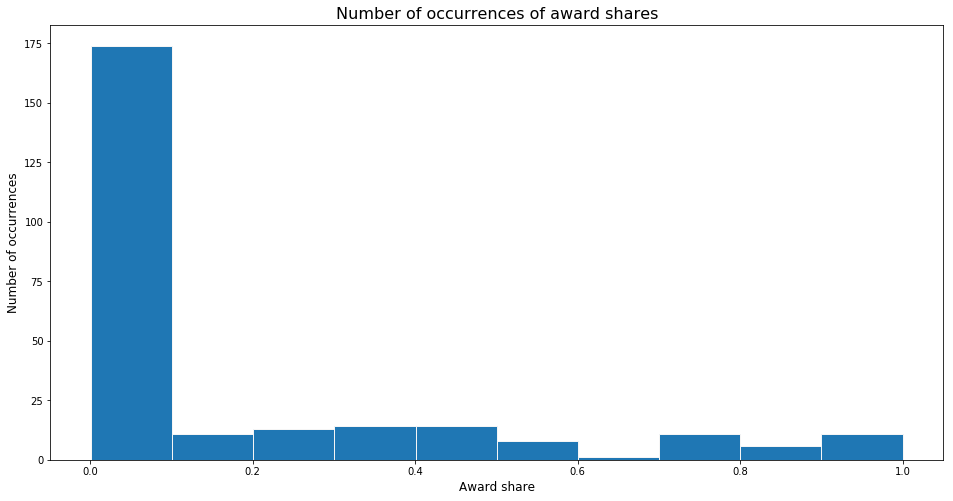

In [33]:
plt.figure(figsize=(16, 8))
plt.hist(temp_data.Share, bins=10, edgecolor='#F5F5F5')
plt.title("Number of occurrences of award shares", size=16)
plt.ylabel("Number of occurrences", size=12)
plt.xlabel("Award share", size=12)

Text(0.5, 0, 'Award share')

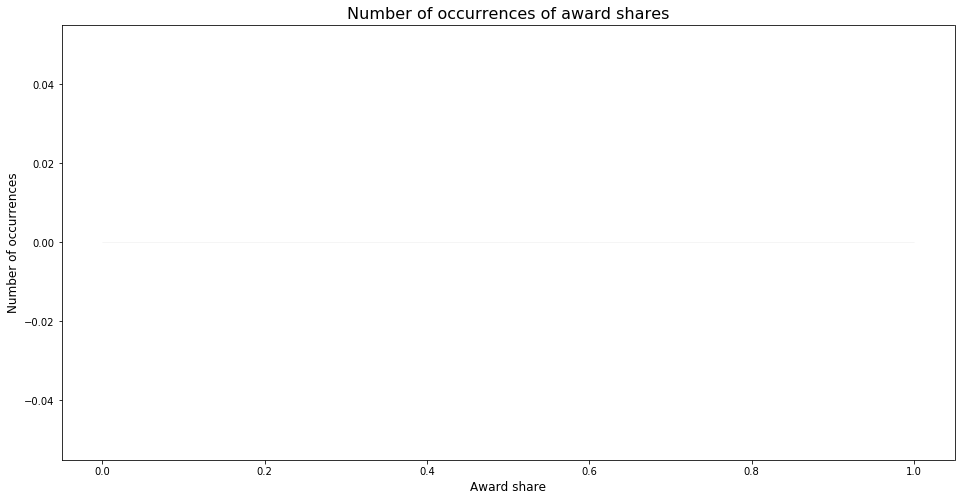

In [34]:
new_share = np.sqrt(train_data.Share)
plt.figure(figsize=(16, 8))
plt.hist(new_share, bins=10, edgecolor='#F5F5F5')
plt.title("Number of occurrences of award shares", size=16)
plt.ylabel("Number of occurrences", size=12)
plt.xlabel("Award share", size=12)

## 特徵關係圖

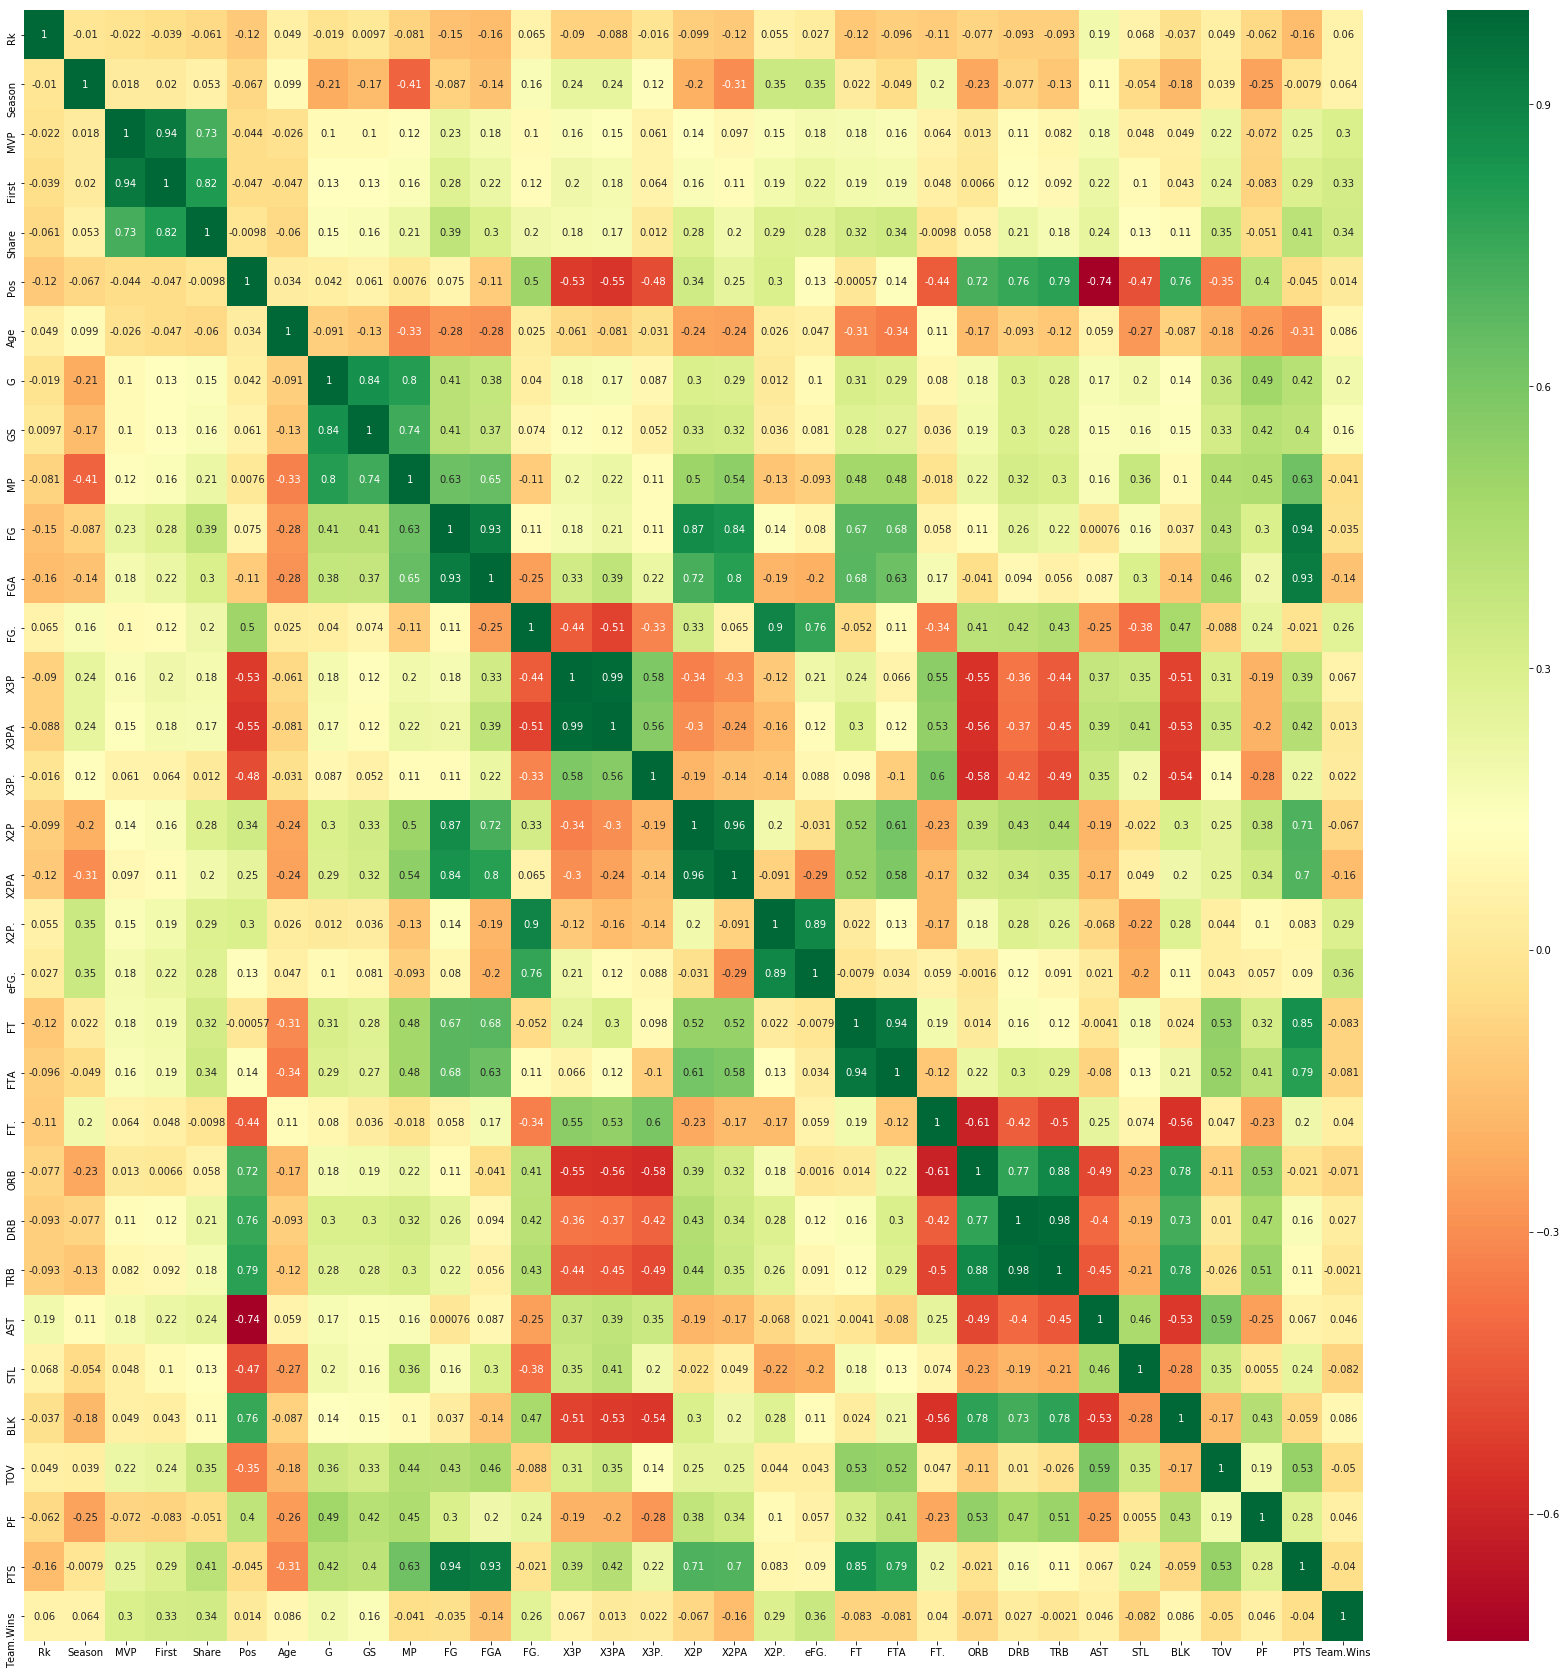

In [35]:
fig = plt.figure(figsize=(30, 30))
fig.set_facecolor('white')
sns.heatmap(temp_data.corr(), annot=True, cmap="RdYlGn")

In [41]:
temp_data.columns

Index(['Rk', 'Player', 'Season', 'MVP', 'First', 'Share', 'Pos', 'Age', 'Tm',
       'G', 'GS', 'MP', 'FG', 'FGA', 'FG.', 'X3P', 'X3PA', 'X3P.', 'X2P',
       'X2PA', 'X2P.', 'eFG.', 'FT', 'FTA', 'FT.', 'ORB', 'DRB', 'TRB', 'AST',
       'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Team.Wins'],
      dtype='object')

In [39]:
from sklearn.ensemble import RandomForestRegressor

feat_X = temp_data.drop(['Player', 'Tm', 'Season', 'Share', 'Rk', 'MVP', 'First'], axis=1)
feat_y = temp_data['Share']
model = RandomForestRegressor(random_state=42, n_jobs=-1)
model.fit(feat_X, feat_y)

C:\Users\ying\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [40]:
feat_labels = feat_X.columns
# print(feat_labels)
importances = model.feature_importances_
# print(importances)
indices = np.argsort(importances)[::-1]
# print(indices)
for feat in range(feat_X.shape[1]):
    print("%d) %-*s %f" % (feat + 1, 30, feat_labels[indices[feat]], importances[indices[feat]]))

1) PTS                            0.163218
2) Team.Wins                      0.159871
3) FG                             0.134971
4) AST                            0.060384
5) TOV                            0.054310
6) FT.                            0.046644
7) X2P.                           0.041851
8) STL                            0.027801
9) ORB                            0.025821
10) X2P                            0.023792
11) FG.                            0.023119
12) BLK                            0.022125
13) FTA                            0.021849
14) PF                             0.019925
15) X3PA                           0.019633
16) Age                            0.019617
17) TRB                            0.018112
18) eFG.                           0.017368
19) FT                             0.017002
20) MP                             0.016600
21) DRB                            0.014148
22) X3P.                           0.014034
23) FGA                            0.0102

In [42]:
feat_X.columns

Index(['Pos', 'Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG.', 'X3P', 'X3PA',
       'X3P.', 'X2P', 'X2PA', 'X2P.', 'eFG.', 'FT', 'FTA', 'FT.', 'ORB', 'DRB',
       'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Team.Wins'],
      dtype='object')

In [43]:
feature = ['PTS', 'Team.Wins', 'FG', 'AST', 'TOV', 'TRB', 'FT']

In [45]:
X = temp_data[feature].to_numpy()
y = temp_data['Share'].to_numpy()

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)
X_sqrt_train, X_sqrt_valid, y_sqrt_train, y_sqrt_valid = train_test_split(X, np.sqrt(y), test_size=0.3, random_state=42)

## K-fold

In [47]:
from sklearn.model_selection import GroupShuffleSplit
def K_fold(model):
    temp_X = data[['WS', 'PTS', 'OWS', 'BPM', 'TRB', 'BLK', 'FTA', 'VORP', 'MVP_Season']]
    temp_y = data[['Share', 'MVP_Season']]
    scores = []

    for year in range(2010, 2020):
        X_train_data, y_train_data = temp_X[temp_X['MVP_Season'] != year].drop('MVP_Season',axis=1).to_numpy(), temp_y[temp_y['MVP_Season'] != year].drop('MVP_Season',axis=1).to_numpy()
        X_valid_data, y_valid_data = temp_X[temp_X['MVP_Season'] == year].drop('MVP_Season',axis=1).to_numpy(), temp_y[temp_y['MVP_Season'] == year].drop('MVP_Season',axis=1).to_numpy()
        model.fit(X_train_data, y_train_data)
        score = model.score(X_valid_data, y_valid_data)
        scores.append(score)
        print('Fold year: %d, Score: %.5f' % (year, score))
    print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

# 計算準確率

In [48]:
# Create function that gives accuracy scores for each model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

def scores(y, model):
    
    model.fit(X_sqrt_train, y_sqrt_train)
    y_pred = model.predict(X_sqrt_valid)
    
    print("預測訓練 R2 score: %.3f" % r2_score(y_sqrt_train, model.predict(X_sqrt_train)))
    print("Mean squared error: %.3f" % mean_squared_error(y_sqrt_valid, y_pred))
    print('R2 score: %.3f' % r2_score(y_sqrt_valid, y_pred))

    cvScore = cross_val_score(model, X_sqrt_valid, y_sqrt_valid, cv = 3, scoring = 'r2')
    print("R2 cross validation score: %0.2f (+/- %0.2f)" % (cvScore.mean(), cvScore.std() * 2))
    
    for i in y_pred:
        y.append(i)

# Models

In [49]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

### SVR

In [94]:
from sklearn.svm import SVR

svr = SVR(kernel='rbf', gamma='auto_deprecated', C=1, epsilon = 0.1112)

pipe_svr = Pipeline([('scl', StandardScaler()),
                    ('clf', svr)])

y_svr = []

scores(y_svr, pipe_svr)

預測訓練 R2 score: 0.587
Mean squared error: 0.094
R2 score: 0.198
R2 cross validation score: -5.31 (+/- 15.06)


### 隨機森林

In [50]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42, n_jobs=-1)

y_rf = []

scores(y_rf, rf)

C:\Users\ying\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


預測訓練 R2 score: 0.874
Mean squared error: 0.061
R2 score: 0.405
R2 cross validation score: 0.30 (+/- 0.32)


### MLP

In [96]:
from sklearn.neural_network import MLPRegressor

dnn = MLPRegressor(
    solver='lbfgs',
    hidden_layer_sizes=100,
    max_iter=10000,
    random_state=987654321,
    activation='identity',
    learning_rate ='invscaling')

pipe_dnn = Pipeline([('scl', StandardScaler()),
                    ('clf', dnn)])


y_dnn = []

scores(y_dnn, pipe_dnn)

預測訓練 R2 score: 0.297
Mean squared error: 0.090
R2 score: 0.231
R2 cross validation score: -15.04 (+/- 38.96)


# 查看特徵是否有影響

In [47]:
from sklearn.model_selection  import ShuffleSplit
from sklearn.metrics import r2_score
from collections import defaultdict

X_temp = X
y_temp = y
names = feature
rf = RandomForestRegressor(random_state=42, n_jobs=-1)
scores = defaultdict(list)

rs = ShuffleSplit(X_temp.size, .3, .7)
for train_idx, test_idx in rs.split(X_temp):
    X_train_temp, X_test_temp = X_temp[train_idx], X_temp[test_idx]
    Y_train_temp, Y_test_temp = y_temp[train_idx], y_temp[test_idx]
    r = rf.fit(X_train_temp, Y_train_temp)
    acc = r2_score(Y_test_temp, rf.predict(X_test_temp))
    for i in range(X_temp.shape[1]):
        X_t = X_test_temp.copy()
        np.random.shuffle(X_t[:, i])
        shuff_acc = r2_score(Y_test_temp, rf.predict(X_t))
        scores[names[i]].append((acc-shuff_acc)/acc)
print("Features sorted by their score:")
print(sorted([(round(np.mean(score), 4), feat) for feat, score in scores.items()], reverse=True))

C:\Users\ying\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Features sorted by their score:
[(0.5667, 'WS'), (0.3622, 'VORP'), (0.298, 'BPM'), (0.2377, 'PTS'), (0.2318, 'FTA'), (0.1523, 'TOV'), (0.0995, 'TRB'), (0.034, 'PF'), (-0.0474, 'AST')]


## 調整參數

In [51]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from pprint import pprint

In [70]:
rf = RandomForestRegressor(random_state=42, n_jobs=-1, n_estimators=100, max_depth=100, min_samples_split=2, min_samples_leaf=2)

In [60]:
from sklearn.model_selection import validation_curve

def find_param(name, param):
    train_scores, valid_scores = validation_curve(estimator=rf, X=X_train, y=y_train, param_name=name, param_range=param, cv=10)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    valid_mean = np.std(valid_scores, axis=1)
    valid_std = np.std(valid_scores, axis=1)
    plt.plot(param, train_mean, color='blue', marker='o', markersize=5, label='train accuracy')
    plt.fill_between(param, train_mean+train_std, train_mean-train_std, alpha=0.15, color='blue')
    plt.plot(param, valid_mean, color='red', marker='s', linestyle='--', markersize=5, label='valid accuracy')
    plt.fill_between(param, valid_mean+valid_std, valid_mean-valid_std, alpha=0.15, color='red')
    plt.grid()
    plt.xscale('log')
    plt.legend(loc='lower right')
    plt.xlabel(name)
    plt.ylabel('Accuracy')
    plt.ylim([0.0, 1.0])
    plt.show()

C:\Users\ying\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3099: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1.0, right=1.0
  self.set_xlim(upper, lower, auto=None)


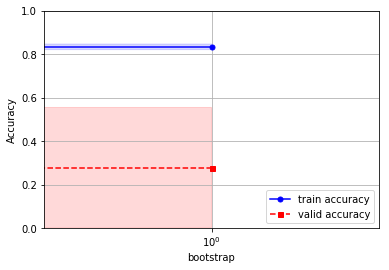

In [71]:
# [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)]
param = [ True, False]
find_param('bootstrap', param)
# param

In [164]:
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [168]:
random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# y_temp = []
# scores(y_temp, random)
random.fit(X_train, y_train)
pprint(random.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 13.0min finished
C:\Users\ying\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'bootstrap': True,
 'max_depth': 4750,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 11500}


In [103]:
rf = RandomForestRegressor(random_state=42, n_jobs=-1, n_estimators=11500, max_depth=4750, min_samples_split=2, min_samples_leaf=3)

In [104]:
y_rf = []
scores(y_rf, rf)
#.479

預測訓練 R2 score: 0.785
Mean squared error: 0.053
R2 score: 0.479
R2 cross validation score: 0.33 (+/- 0.24)
